In [ ]:
%matplotlib inline 
from pylab import *

In [ ]:
from plasticnet import *

Splikes version  0.1.2
Plasticnet version  0.1.11


## 1D BCM

In [ ]:
from plasticnet import *
pre=neurons.pattern_neuron([10])
post=neurons.linear_neuron(1)

c=connections.BCM(pre,post,[0,.05])
c.eta=5e-7
c.tau=1000

sim=simulation(1000*1000)
sim.monitor(c,['weights','theta'],1000)

run_sim(sim,[pre,post],[c],display_hash=False)


Sim Time Elapsed...0.19 s


Text(0, 0.5, 'Time')

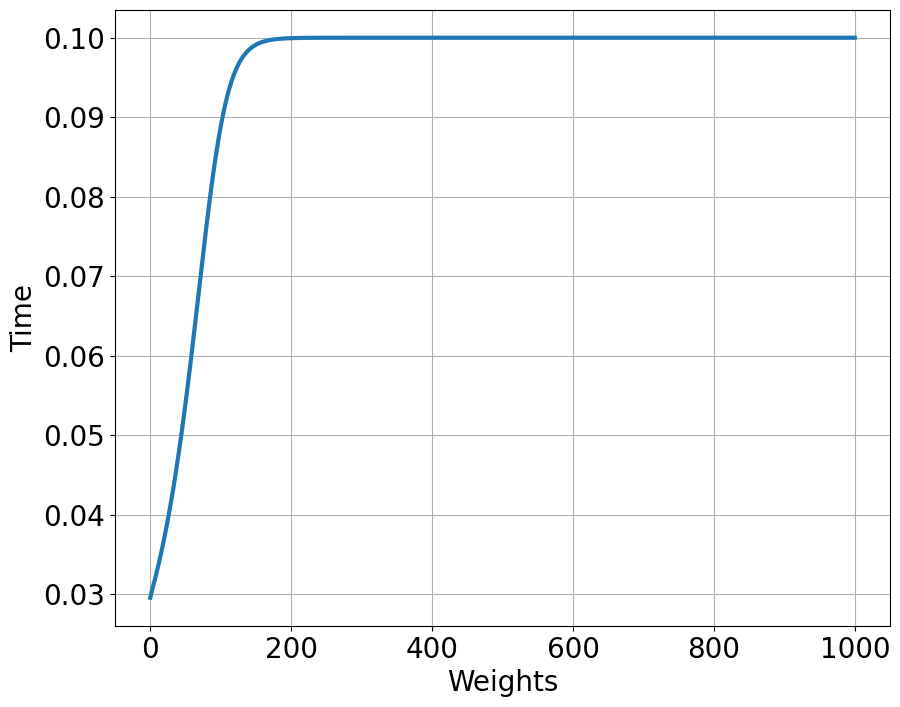

In [ ]:
w=sim.monitors['weights'].array().squeeze()
plot(w)
xlabel('Weights')
ylabel('Time')

## 2D BCM

In [ ]:
pre=neurons.pattern_neuron([[2,3],[3,1]])
post=neurons.linear_neuron(1)

c=connections.BCM(pre,post,[0,.05])
c.eta=5e-5
c.tau=1000

sim=simulation(1000*1000)
sim.monitor(c,['weights','theta'],1000)

run_sim(sim,[pre,post],[c],display_hash=False)


Sim Time Elapsed...0.20 s


Text(0.5, 0, 'Time')

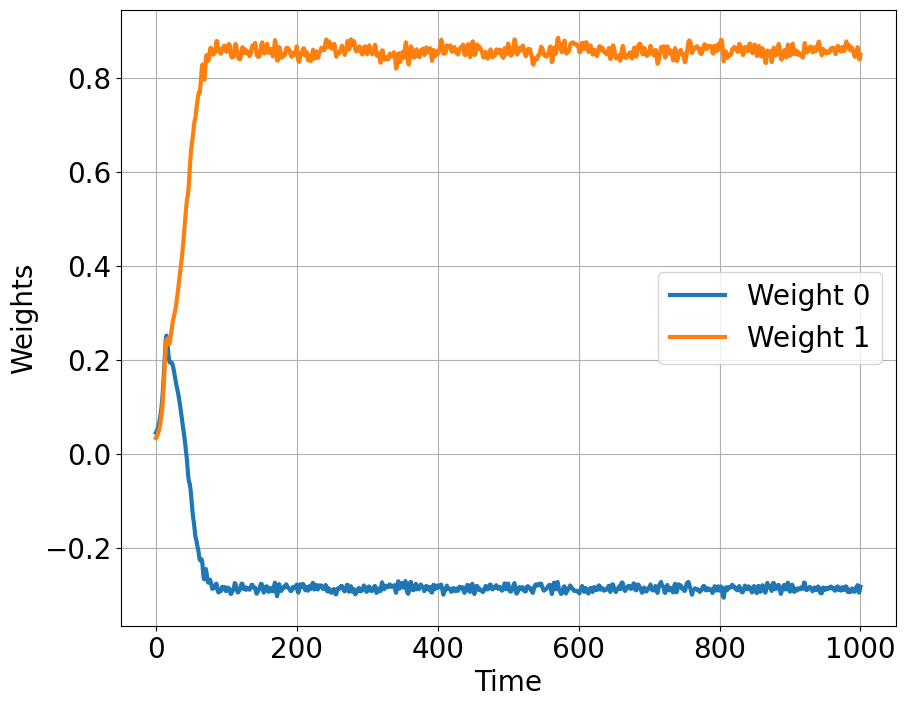

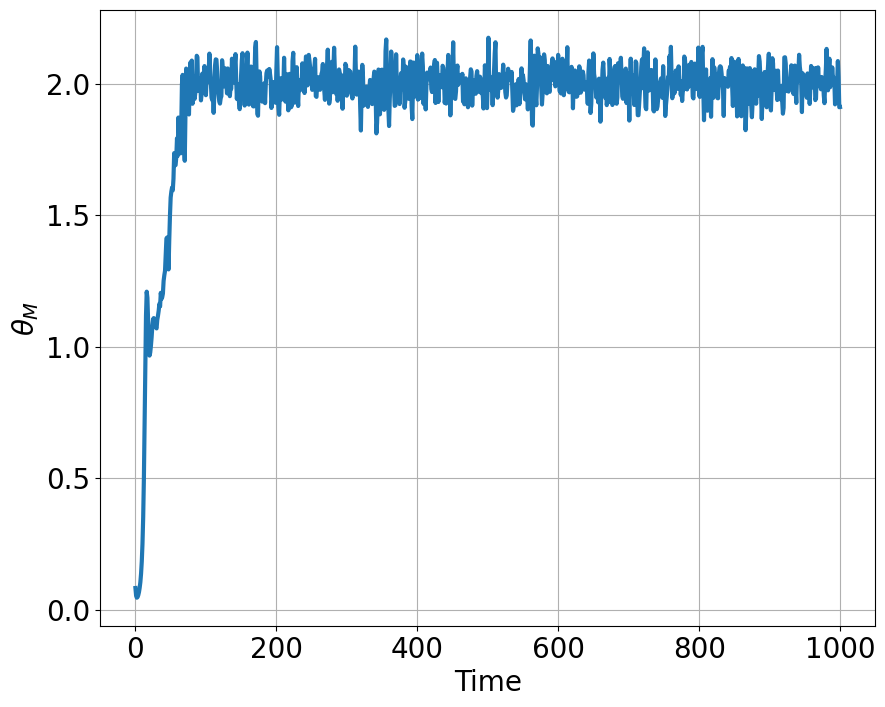

In [ ]:
weights=sim.monitors['weights'].array().squeeze()
plot(weights)
legend(['Weight 0','Weight 1'])
ylabel('Weights')
xlabel('Time')

figure()
theta=sim.monitors['theta'].array().squeeze()
plot(theta)
ylabel(r'$\theta_M$')
xlabel('Time')

<matplotlib.legend.Legend>

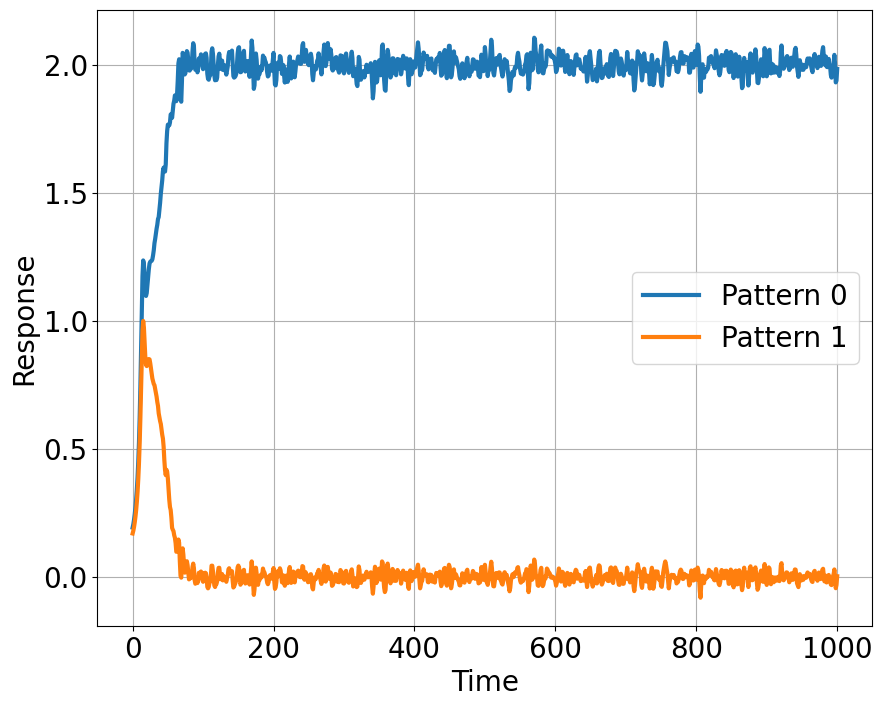

In [ ]:
outputs=[]
for w in weights:
    output=[sum(x*w) for x in pre.patterns]
    outputs.append(output)
outputs=array(outputs)

plot(outputs)
xlabel('Time')
ylabel('Response')
legend(['Pattern 0','Pattern 1'])

## 2D Hebb

In [ ]:
pre=neurons.pattern_neuron([[2,3],[3,1]])
post=neurons.linear_neuron(1)

c=connections.Hebb(pre,post,[0,.05])
c+=connections.process.normalization()

c.eta=5e-5
c.tau=1000

sim=simulation(1000*1000)
sim.monitor(c,['weights','theta'],1000)

run_sim(sim,[pre,post],[c],display_hash=False)


Sim Time Elapsed...0.23 s


Text(0.5, 0, 'Time')

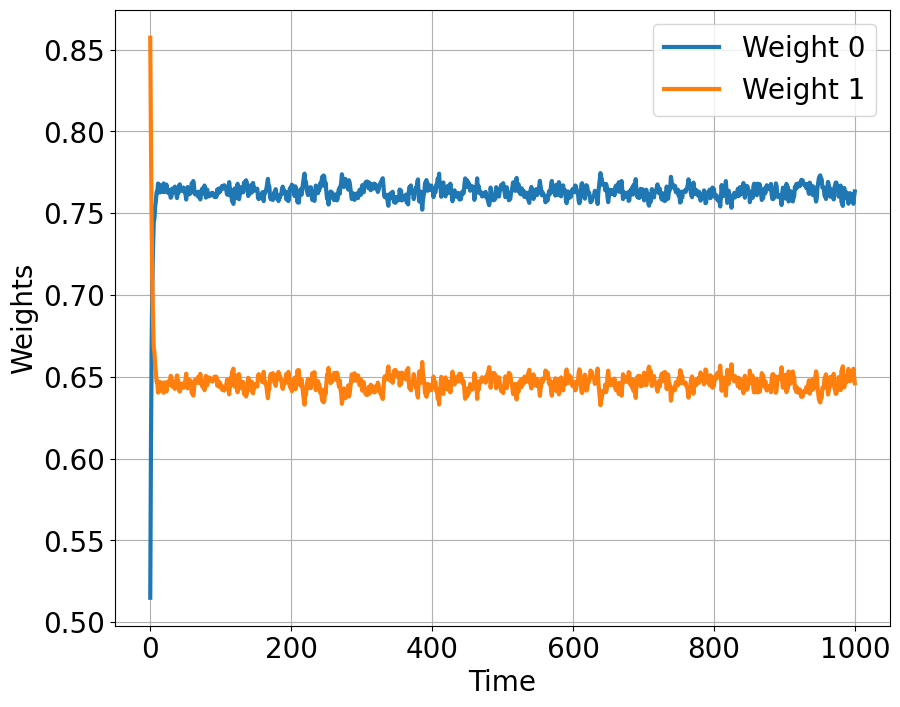

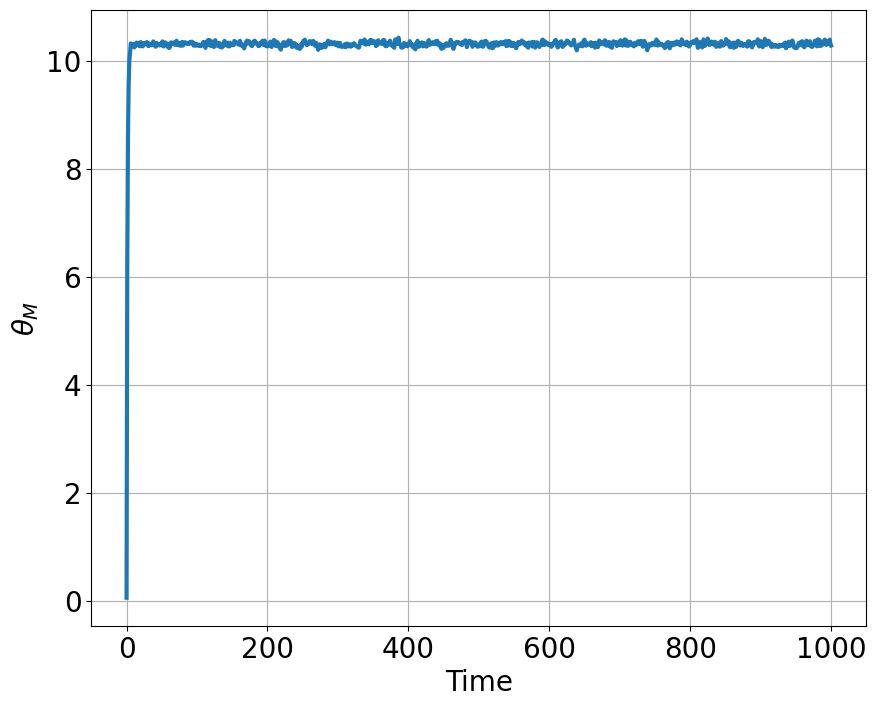

In [ ]:
weights=sim.monitors['weights'].array().squeeze()
plot(weights)
legend(['Weight 0','Weight 1'])
ylabel('Weights')
xlabel('Time')

figure()
theta=sim.monitors['theta'].array().squeeze()
plot(theta)
ylabel(r'$\theta_M$')
xlabel('Time')

<matplotlib.legend.Legend>

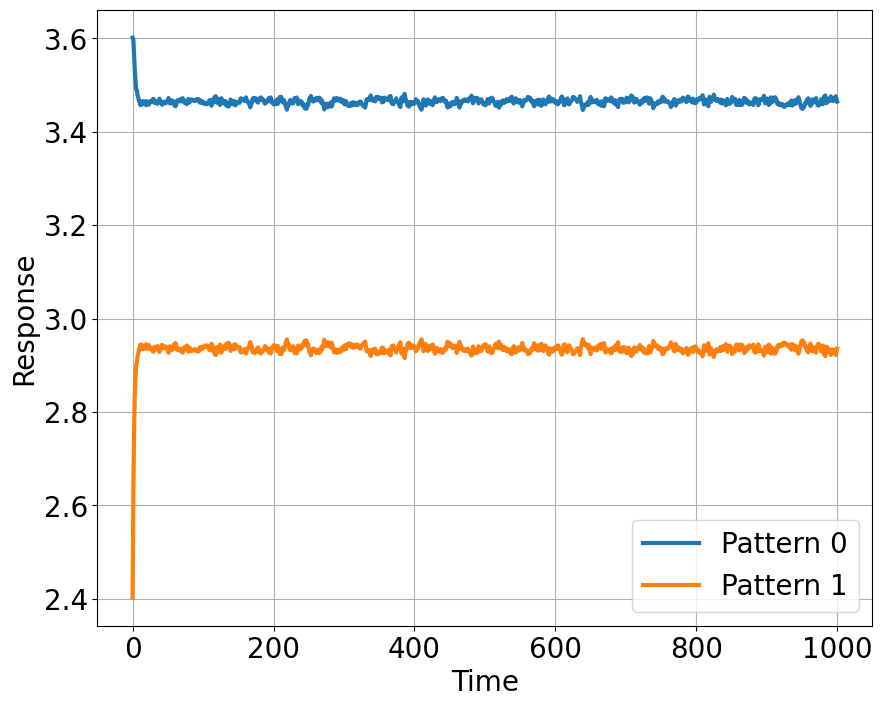

In [ ]:
outputs=[]
for w in weights:
    output=[sum(x*w) for x in pre.patterns]
    outputs.append(output)
outputs=array(outputs)

plot(outputs)
xlabel('Time')
ylabel('Response')
legend(['Pattern 0','Pattern 1'])